## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

on souhaite construire un modele generatif z, u --> x

en entrée : z et u 

z se projette sur un espace de caracteristiques n x 2D

u est une transformation appliquee dans cet espace latent. 
la translation est appliquee uniformement à chacune des n caracteristiques

le code est ensuite utilisé pour generer une image

validation du code par reconstruction de x en sortie (BCE Loss)



In [1]:
%matplotlib inline

In [2]:
from Where_act_code import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'valid_size': 0.2, 'lr': 0.001, 'mean': 0.0, 'seed': 42, 'batch_size': 50, 'verbose': 1, 'momentum': 0.48, 'std': 1.0, 'size': 64, 'no_cuda': True, 'test_batch_size': 1, 'epochs': 10, 'log_interval': 10, 'dimension': 25, 'num_processes': 1}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-07-26_actionnable_code_BIAS.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_BIAS.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_BIAS.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7effcd1f1c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff957d4470>)

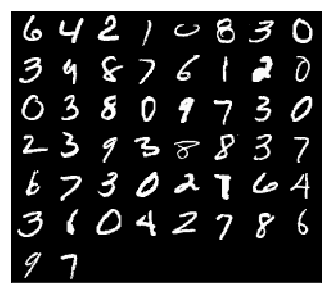

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (fc_label_d1): Linear(in_features=10, out_features=32, bias=False)
  (fc_label_d2): Linear(in_features=10, out_features=32, bias=False)
  (fc_transcode_d1): Linear(in_features=32, out_features=256, bias=True)
  (fc_transcode_d2): Linear(in_features=32, out_features=256, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 100 #1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	BCELoss: 0.693506
	Train Epoch: 1 [500/60000 (1%)]	BCELoss: 0.686968
	Train Epoch: 1 [1000/60000 (2%)]	BCELoss: 0.658453
	Train Epoch: 1 [1500/60000 (2%)]	BCELoss: 0.518266
	Train Epoch: 1 [2000/60000 (3%)]	BCELoss: 0.235388
	Train Epoch: 1 [2500/60000 (4%)]	BCELoss: 0.137059
	Train Epoch: 1 [3000/60000 (5%)]	BCELoss: 0.141033
	Train Epoch: 1 [3500/60000 (6%)]	BCELoss: 0.101923
	Train Epoch: 1 [4000/60000 (7%)]	BCELoss: 0.096390
	Train Epoch: 1 [4500/60000 (8%)]	BCELoss: 0.102422
	Train Epoch: 1 [5000/60000 (8%)]	BCELoss: 0.081874
	Train Epoch: 1 [5500/60000 (9%)]	BCELoss: 0.094433
	Train Epoch: 1 [6000/60000 (10%)]	BCELoss: 0.089854
	Train Epoch: 1 [6500/60000 (11%)]	BCELoss: 0.091967
	Train Epoch: 1 [7000/60000 (12%)]	BCELoss: 0.082212
	Train Epoch: 1 [7500/60000 (12%)]	BCELoss: 0.086036
	Train Epoch: 1 [8000/60000 (13%)]	BCELoss: 0.078826
	Train Epoch: 1 [8500/60000 (14%)]	BCELoss: 0.077985
	Train Epoch: 1 [9000/60000 (15%)]	BCELoss: 0.0818

	Train Epoch: 2 [16500/60000 (28%)]	BCELoss: 0.050388
	Train Epoch: 2 [17000/60000 (28%)]	BCELoss: 0.046568
	Train Epoch: 2 [17500/60000 (29%)]	BCELoss: 0.054363
	Train Epoch: 2 [18000/60000 (30%)]	BCELoss: 0.052379
	Train Epoch: 2 [18500/60000 (31%)]	BCELoss: 0.046972
	Train Epoch: 2 [19000/60000 (32%)]	BCELoss: 0.051842
	Train Epoch: 2 [19500/60000 (32%)]	BCELoss: 0.049909
	Train Epoch: 2 [20000/60000 (33%)]	BCELoss: 0.052127
	Train Epoch: 2 [20500/60000 (34%)]	BCELoss: 0.048367
	Train Epoch: 2 [21000/60000 (35%)]	BCELoss: 0.047990
	Train Epoch: 2 [21500/60000 (36%)]	BCELoss: 0.048009
	Train Epoch: 2 [22000/60000 (37%)]	BCELoss: 0.051043
	Train Epoch: 2 [22500/60000 (38%)]	BCELoss: 0.050345
	Train Epoch: 2 [23000/60000 (38%)]	BCELoss: 0.049454
	Train Epoch: 2 [23500/60000 (39%)]	BCELoss: 0.046917
	Train Epoch: 2 [24000/60000 (40%)]	BCELoss: 0.047153
	Train Epoch: 2 [24500/60000 (41%)]	BCELoss: 0.046967
	Train Epoch: 2 [25000/60000 (42%)]	BCELoss: 0.049899
	Train Epoch: 2 [25500/60000

Process Process-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


	Train Epoch: 3 [3000/60000 (5%)]	BCELoss: 0.048167


KeyboardInterrupt: 

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

torch.Size([50, 1, 28, 28])
0 -32


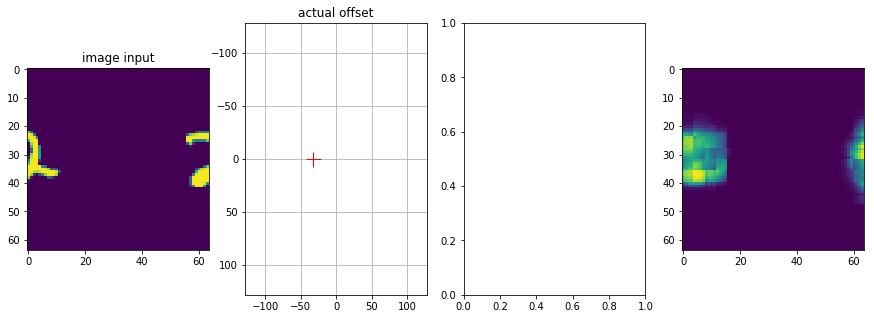

torch.Size([50, 1, 28, 28])
0 -28


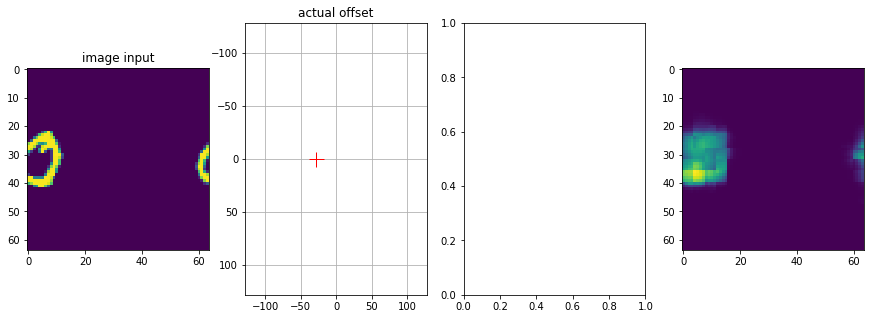

torch.Size([50, 1, 28, 28])
0 -24


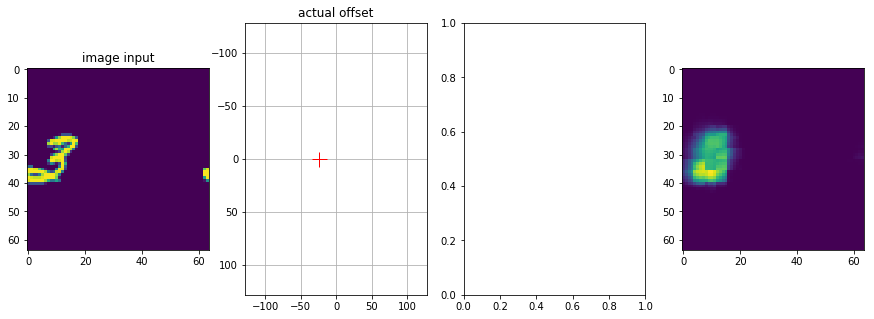

torch.Size([50, 1, 28, 28])
0 -20


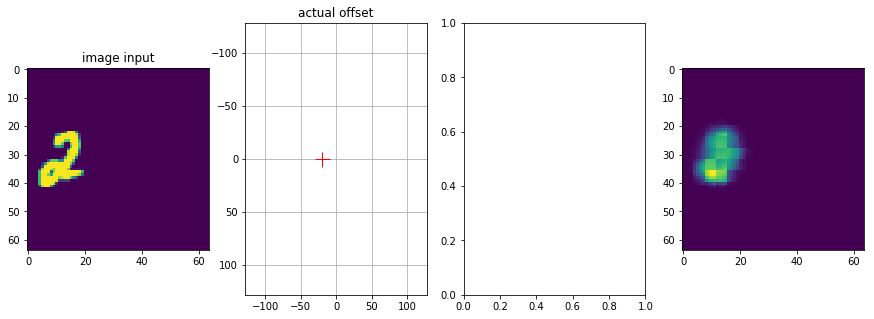

torch.Size([50, 1, 28, 28])
0 -16


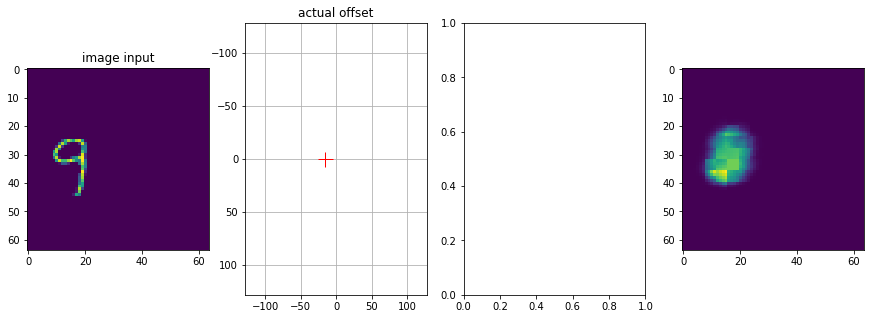

torch.Size([50, 1, 28, 28])
0 -12


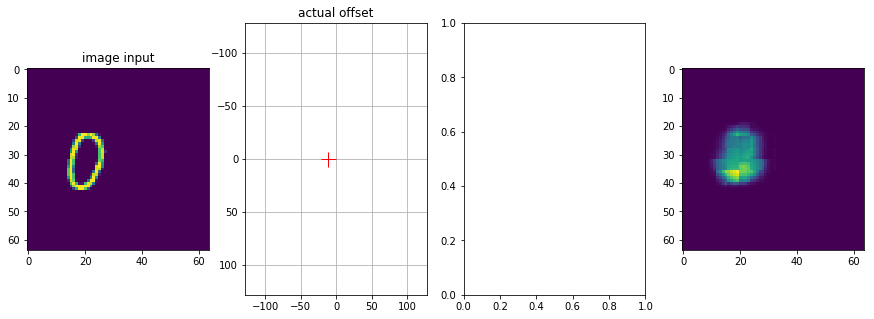

torch.Size([50, 1, 28, 28])
0 -8


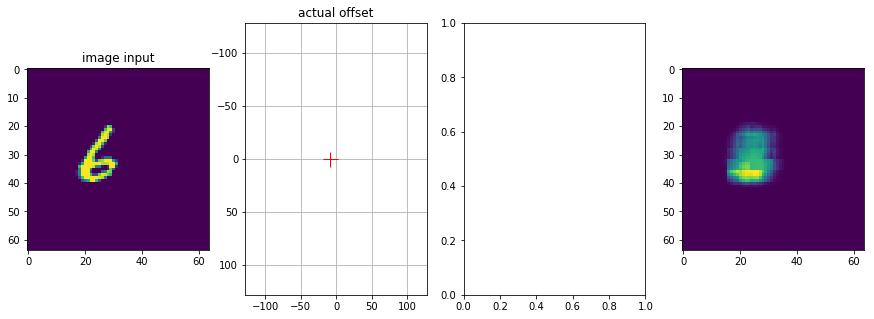

torch.Size([50, 1, 28, 28])
0 -4


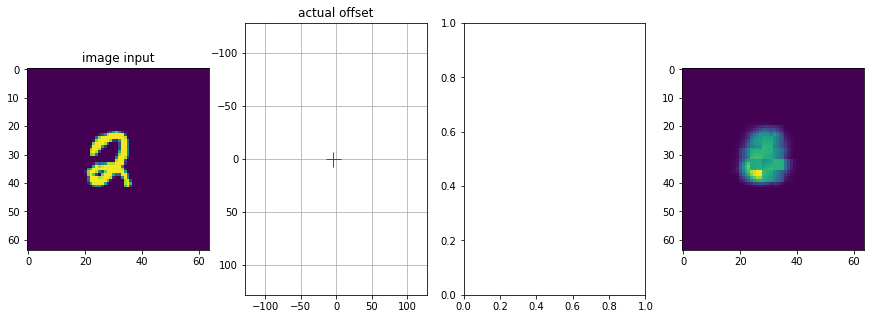

torch.Size([50, 1, 28, 28])
0 0


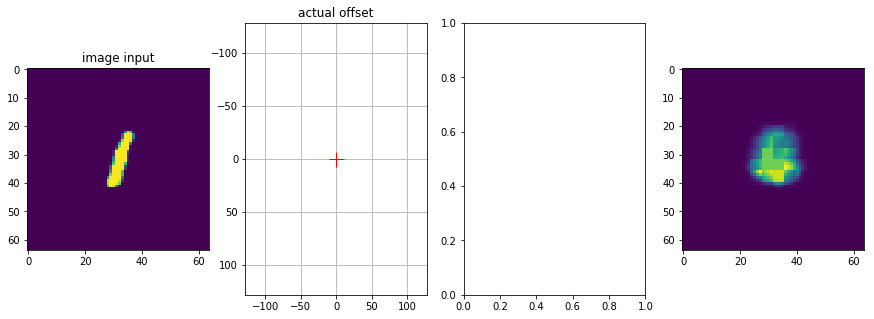

torch.Size([50, 1, 28, 28])
0 4


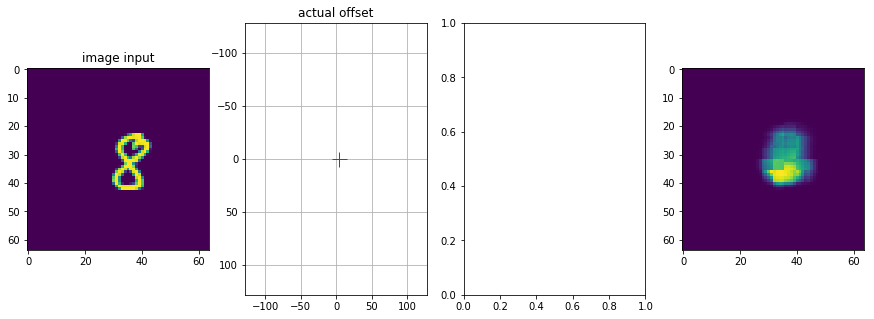

torch.Size([50, 1, 28, 28])
0 8


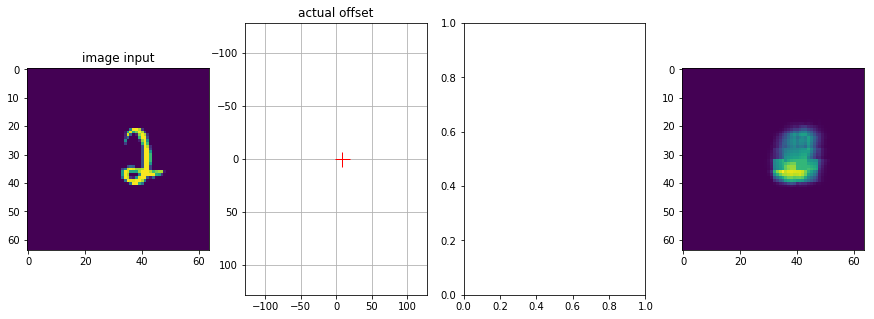

torch.Size([50, 1, 28, 28])
0 12


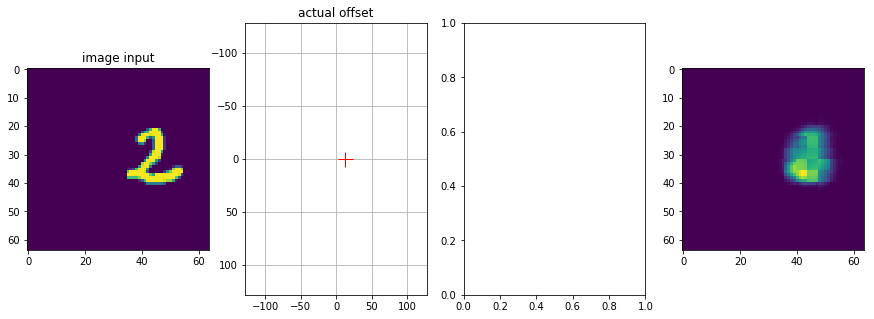

torch.Size([50, 1, 28, 28])
0 16


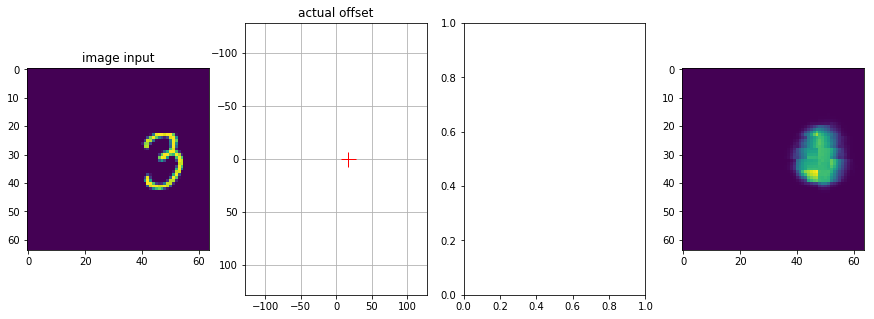

torch.Size([50, 1, 28, 28])
0 20


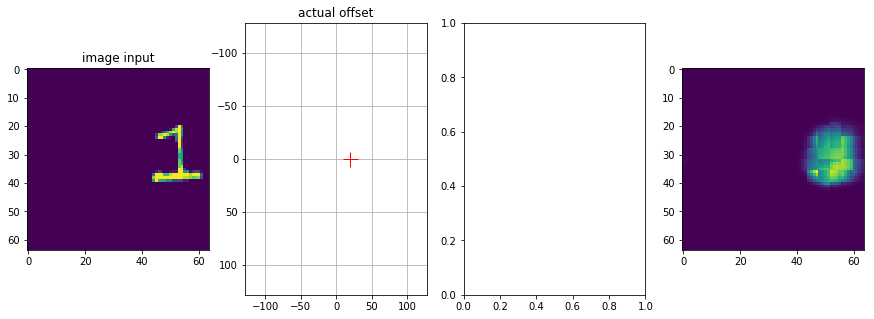

torch.Size([50, 1, 28, 28])
0 24


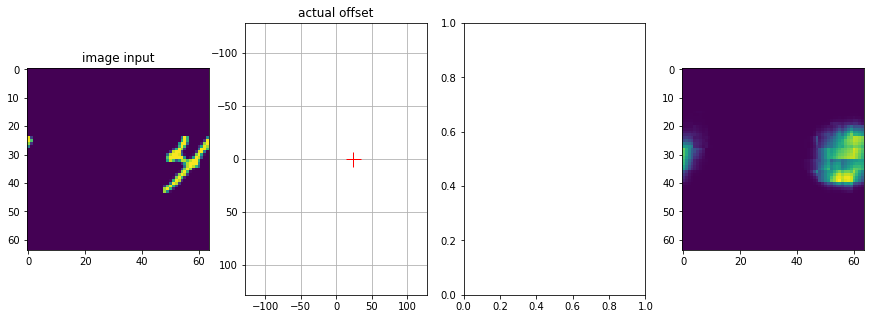

torch.Size([50, 1, 28, 28])
0 28


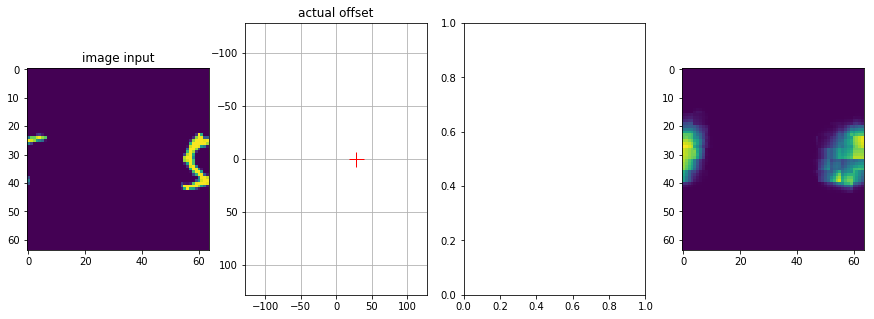

In [16]:
%matplotlib inline
import torch

from Where_act_code import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    label[idx] = 6
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[0].imshow(data_full)
    ax[0].set_title('image input')
   
    x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[0]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-128, 128])
    ax[1].set_ylim([128, -128])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    '''u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[2].contourf(axe_x, axe_y, q.pdf(pos))
    ax[2].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[2].xaxis.grid(True)
    ax[2].set_xlim([-4, 4])
    ax[2].set_ylim([-4, 4])
    ax[2].yaxis.grid(True)
    ax[2].set_title('offset PG encoding')    
    ax[2].axis('equal')'''
    
    ax[3].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    
    plt.show()    

10 10


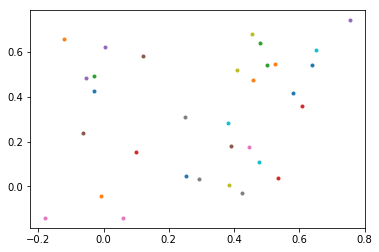

10 10


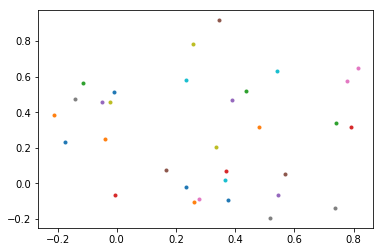

10 10


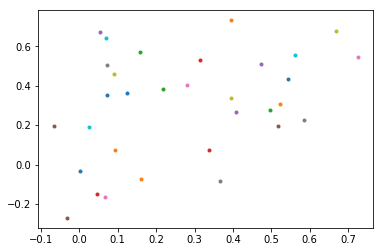

10 10


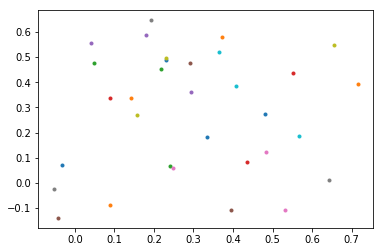

10 10


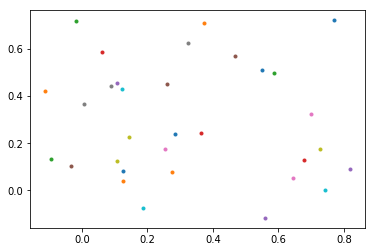

10 10


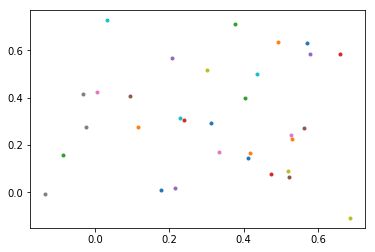

10 10


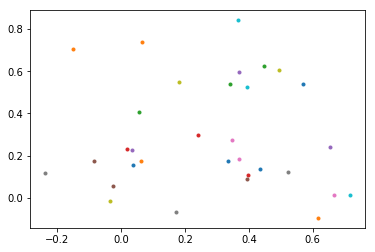

10 10


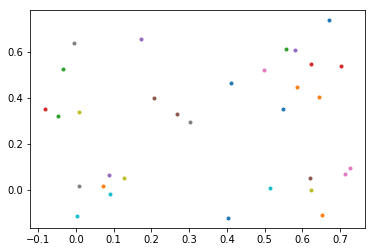

10 10


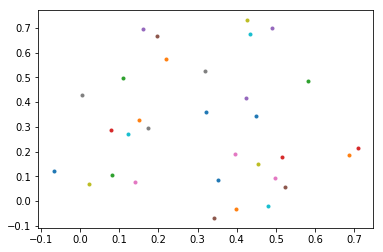

10 10


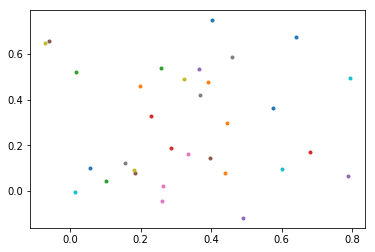

In [17]:
from Where_act_code import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for z in range(10):
    label[idx] = z
    i_offset = 10
    j_offset = 10
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)